# Cross validation

In [64]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

Rozważmy następujący zbiór punktów:

In [65]:
plt.style.use('seaborn-white')

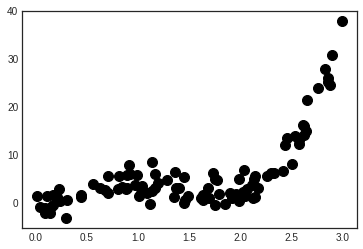

In [68]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,2).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [69]:
x=x[:,np.newaxis]

## k-fold (generator indeksów dla podziału na model treningowy i testowy)

In [73]:
seed = 123 # za każdym razem ten sam podział
kf = KFold(n_splits=4,shuffle=True,random_state=seed)#wymiasza indeksy przed podziałem
kf.get_n_splits(x)

4

In [82]:
list(kf.split(x))

[(array([ 1,  2,  3,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21,
         22, 25, 26, 27, 30, 32, 33, 34, 36, 37, 39, 40, 41, 43, 44, 45, 46,
         47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 64, 66, 67, 68,
         69, 71, 72, 73, 74, 78, 79, 80, 83, 84, 85, 86, 87, 89, 90, 91, 92,
         93, 94, 95, 96, 97, 98, 99]),
  array([ 0,  4,  5,  8, 19, 23, 24, 28, 29, 31, 35, 38, 42, 50, 56, 60, 63,
         65, 70, 75, 76, 77, 81, 82, 88])),
 (array([ 0,  2,  3,  4,  5,  6,  7,  8, 10, 13, 15, 16, 17, 18, 19, 22, 23,
         24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43,
         44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 60, 61, 63, 64,
         65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 86,
         88, 92, 93, 94, 96, 98, 99]),
  array([ 1,  9, 11, 12, 14, 20, 21, 33, 37, 41, 53, 54, 59, 62, 69, 74, 79,
         84, 85, 87, 89, 90, 91, 95, 97])),
 (array([ 0,  1,  2,  4,  5,  8,  9, 11, 12, 14, 17, 19, 20, 21,

# cross_val_score

In [96]:
pf = PolynomialFeatures(2)
pf.fit_transform(x)#1,x,x2

array([[  1.00000000e+00,   1.85042429e+00,   3.42407004e+00],
       [  1.00000000e+00,   2.33132170e+00,   5.43506085e+00],
       [  1.00000000e+00,   1.40398450e+00,   1.97117249e+00],
       [  1.00000000e+00,   2.06602868e+00,   4.26847453e+00],
       [  1.00000000e+00,   2.64410475e+00,   6.99128991e+00],
       [  1.00000000e+00,   8.83229944e-01,   7.80095134e-01],
       [  1.00000000e+00,   2.30648833e+00,   5.31988840e+00],
       [  1.00000000e+00,   2.61756634e+00,   6.85165354e+00],
       [  1.00000000e+00,   1.69669306e+00,   2.87876732e+00],
       [  1.00000000e+00,   2.62635188e+00,   6.89772418e+00],
       [  1.00000000e+00,   7.03846136e-01,   4.95399383e-01],
       [  1.00000000e+00,   9.65843803e-02,   9.32854251e-03],
       [  1.00000000e+00,   3.09300983e-01,   9.56670981e-02],
       [  1.00000000e+00,   1.36972321e+00,   1.87614168e+00],
       [  1.00000000e+00,   7.08819568e-01,   5.02425180e-01],
       [  1.00000000e+00,   2.27609834e-01,   5.1806236

In [49]:
model2 = make_pipeline(PolynomialFeatures(2),lm.LinearRegression())

In [50]:
cross_val_score(model2, x, y, cv=kf)

array([ 0.86275621,  0.85758079,  0.83741382,  0.87615153])

In [51]:
cross_val_score(model2, x, y, cv=kf, scoring='r2')

array([ 0.86275621,  0.85758079,  0.83741382,  0.87615153])

In [63]:
cross_val_score(model2, x, y, cv=kf, scoring='neg_mean_squared_error')

array([-11.63430981, -13.27899719, -15.12878154, -17.661352  ])

# cross_val_predict

In [52]:
y_pred = cross_val_predict(model2, x, y, cv=kf)

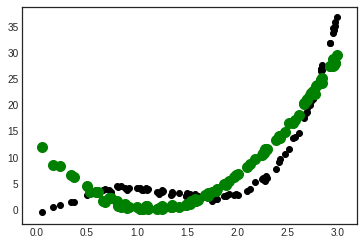

In [53]:
plt.scatter(x,y,color="k")
plt.scatter(x,y_pred,marker="o",color="g",s=100)
plt.show();